# Cryptocurrency Adoption Analysis in Nigeria, Ukraine, and India

This notebook performs an exploratory data analysis (EDA) to examine cryptocurrency adoption in Nigeria, Ukraine, and India, over the time period of 2024-2025. We will be focusing on economic, social, and technological indicators. The analysis includes data cleaning, visualization, and correlation analysis to uncover insights into factors influencing crypto adoption. 

## 1. Setup and Imports

We start by importing the necessary Python libraries for data manipulation, visualization, and statistical analysis.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, dendrogram

# Set visualization style for consistency
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12

## 2. Data Loading

The dataset contains socioeconomic and cryptocurrency-related indicators for Nigeria, Ukraine, and India. 
We load the data into a `pandas` DataFrame for analysis. These sources for this data can be seen below in the "Sources for data" table. 

**Nigeria**

In [7]:
data_nigeria = {
    'Indicator': [
        'Global Peace Index score', 'Homicide rate/100k', 'Ongoing conflicts',
        'Currency', '3-yr USD volatility (std dev of monthly % changes)', 'Current inflation %',
        'Exchange rate high/low last 3 yrs (USD/NGN)', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
        'Poverty rate %', 'Unemployment %', 'Gini coefficient', '1-2 yr growth forecast %',
        'Median age (yrs)', 'Fertility rate (births/woman)', 'Pop growth rate %',
        'Smartphone ownership %', 'Internet penetration %', 'Mobile money users %',
        '% population owning crypto', 'Correlation notes (r-value with violence/volatility)',
        'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
        'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)', 'Regulatory status'
    ],
    'Value/Metric': [
        '2.869', '34.5', 'Yes (Boko Haram, banditry; ~2,000 deaths/year)',
        'NGN', '0.25', '20.12',
        'High: 1700 / Low: 420', '2,000', '6,439.8',
        '40', '5', '35.1', '3.4 (2025), 3.2 (2026)',
        '18', '5.2', '2.4',
        '60', '46', '45',
        '10.3', 'N/A',
        '59', '108,000', '30',
        '500', '22', '10,000', 'Licensed'
    ]
}
df_nigeria = pd.DataFrame(data_nigeria)
df_nigeria

,Indicator,Value/Metric
0,Global Peace Index score,2.869
1,Homicide rate/100k,34.5
2,Ongoing conflicts,"Yes (Boko Haram, banditry; ~2,000 deaths/year)"
3,Currency,NGN
4,3-yr USD volatility (std dev of monthly % chan...,0.25
5,Current inflation %,20.12
6,Exchange rate high/low last 3 yrs (USD/NGN),High: 1700 / Low: 420
7,"GDP/capita (nominal, USD)","2,000"
8,"GDP/capita (PPP, intl $)","6,439.8"
9,Poverty rate %,40


**Ukraine**

In [8]:
data_ukraine = {
    'Indicator': [
        'Global Peace Index score', 'Homicide rate/100k', 'Ongoing conflicts',
        'Currency', '3-yr USD volatility (std dev of monthly % changes)', 'Current inflation %',
        'Exchange rate high/low last 3 yrs (USD/UAH)', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
        'Poverty rate %', 'Unemployment %', 'Gini coefficient', '1-2 yr growth forecast %',
        'Median age (yrs)', 'Fertility rate (births/woman)', 'Pop growth rate %',
        'Smartphone ownership %', 'Internet penetration %', 'Mobile money users %',
        '% population owning crypto', 'Correlation notes (r-value with violence/volatility)',
        'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
        'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)', 'Regulatory status'
    ],
    'Value/Metric': [
        '3.434', '5', 'Yes (War with Russia; 50,000+ deaths/year)',
        'UAH', '0.06', '13.2',
        'High: 42 / Low: 36', '5,389.5', '16,319.84',
        '37', '15.3', '26.6', '2.0 (2025), 3.0 (2026)',
        '41.8', '1.3', '-0.5',
        '75', '82.4', '10',
        '15', 'N/A',
        '106.1', '108,000', '30',
        '500', '6', '897', 'Legal'
    ]
}
df_ukraine = pd.DataFrame(data_ukraine)
df_ukraine

,Indicator,Value/Metric
0,Global Peace Index score,3.434
1,Homicide rate/100k,5
2,Ongoing conflicts,"Yes (War with Russia; 50,000+ deaths/year)"
3,Currency,UAH
4,3-yr USD volatility (std dev of monthly % chan...,0.06
5,Current inflation %,13.2
6,Exchange rate high/low last 3 yrs (USD/UAH),High: 42 / Low: 36
7,"GDP/capita (nominal, USD)","5,389.5"
8,"GDP/capita (PPP, intl $)","16,319.84"
9,Poverty rate %,37


**India**

In [9]:
data_india = {
    'Indicator': [
        'Global Peace Index score', 'Homicide rate/100k', 'Ongoing conflicts',
        'Currency', '3-yr USD volatility (std dev of monthly % changes)', 'Current inflation %',
        'Exchange rate high/low last 3 yrs (USD/INR)', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
        'Poverty rate %', 'Unemployment %', 'Gini coefficient', '1-2 yr growth forecast %',
        'Median age (yrs)', 'Fertility rate (births/woman)', 'Pop growth rate %',
        'Smartphone ownership %', 'Internet penetration %', 'Mobile money users %',
        '% population owning crypto', 'Correlation notes (r-value with violence/volatility)',
        'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
        'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)', 'Regulatory status'
    ],
    'Value/Metric': [
        '2.229', '3', 'Yes (Insurgencies; ~500 deaths/year)',
        'INR', '0.03', '5.0',
        'High: 88 / Low: 80', '2,696.7', '11,158.9',
        '5', '5.1', '25.5', '6.4 (2025), 6.4 (2026)',
        '29', '2.0', '0.8',
        '67', '50.3', '40',
        '7.3', 'N/A',
        '62.9', '108,000', '30',
        '500', '100', '1,500', 'Legal'
    ]
}
df_india = pd.DataFrame(data_india)
df_india

,Indicator,Value/Metric
0,Global Peace Index score,2.229
1,Homicide rate/100k,3
2,Ongoing conflicts,Yes (Insurgencies; ~500 deaths/year)
3,Currency,INR
4,3-yr USD volatility (std dev of monthly % chan...,0.03
5,Current inflation %,5.0
6,Exchange rate high/low last 3 yrs (USD/INR),High: 88 / Low: 80
7,"GDP/capita (nominal, USD)","2,696.7"
8,"GDP/capita (PPP, intl $)","11,158.9"
9,Poverty rate %,5


**Sources for data**


| Category | Indicator | Source |
|----------|-----------|--------|
| Indicators of Violence | Global Peace Index score | Institute for Economics & Peace - Global Peace Index 2025 Report: https://www.visionofhumanity.org/resources/ |
| Indicators of Violence | Homicide rate/100k | United Nations Office on Drugs and Crime (UNODC) - International Statistics on Crime and Justice: https://dataunodc.un.org/ |
| Indicators of Violence | Ongoing conflicts | Uppsala Conflict Data Program (UCDP) - Armed Conflict Database: https://ucdp.uu.se/ |
| Currency Volatility | 3-yr USD volatility (std dev of monthly % changes) | International Monetary Fund (IMF) - International Financial Statistics: https://data.imf.org/?sk=4C514D48-B6BA-49E4-8F14-9C4E5DE8E8B5 |
| Currency Volatility | Current inflation % | World Bank - World Development Indicators: https://databank.worldbank.org/source/world-development-indicators |
| Currency Volatility | Exchange rate high/low last 3 yrs | IMF - International Financial Statistics (via OANDA data): https://data.imf.org/ |
| Financial Outlook | GDP/capita (nominal, USD) | World Bank - GDP per capita data: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD |
| Financial Outlook | GDP/capita (PPP, intl $) | World Bank - GDP per capita data: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD |
| Financial Outlook | Poverty rate % | World Bank - Poverty and Inequality Platform: https://pip.worldbank.org/ |
| Financial Outlook | Unemployment % | International Labour Organization (ILO) - ILOSTAT Database: https://ilostat.ilo.org/data/ |
| Financial Outlook | Gini coefficient | World Bank - Gini index data: https://data.worldbank.org/indicator/SI.POV.GINI |
| Financial Outlook | 1-2 yr growth forecast % | IMF - World Economic Outlook Database (October 2025): https://www.imf.org/en/Publications/WEO/weo-database/2025/October |
| Demographics | Median age (yrs) | United Nations - World Population Prospects 2024: https://population.un.org/wpp/Download/Standard/Population/ |
| Demographics | Fertility rate (births/woman) | United Nations - World Population Prospects 2024: https://population.un.org/wpp/Download/Standard/Population/ |
| Demographics | Pop growth rate % | United Nations - World Population Prospects 2024: https://population.un.org/wpp/Download/Standard/Population/ |
| Computer/Phone Usage | Smartphone ownership % | GSMA Intelligence - Mobile Economy Reports 2025: https://www.gsma.com/mobileeconomy/ |
| Computer/Phone Usage | Internet penetration % | GSMA Intelligence - Mobile Economy Reports 2025: https://www.gsma.com/mobileeconomy/ |
| Computer/Phone Usage | Mobile money users % | World Bank - Findex Database 2024: https://www.worldbank.org/en/publication/globalfindex |
| Crypto Adoption | % population owning crypto | Chainalysis - 2025 Global Crypto Adoption Index: https://www.chainalysis.com/blog/2025-crypto-adoption/ |
| Crypto Adoption | Correlation notes (r-value with violence/volatility) | Computed internally using scipy.stats (derived from IMF and Chainalysis data) |
| Crypto Data | Annual trading volume (USD bn) | Chainalysis - 2025 Global Crypto Adoption Index: https://www.chainalysis.com/blog/2025-crypto-adoption/ |
| Crypto Data | Avg BTC price last month (USD) | CoinMarketCap - Historical Data API: https://coinmarketcap.com/api/ |
| Crypto Data | 30-day volatility % (std dev) | CoinMarketCap - Historical Data API: https://coinmarketcap.com/api/ |
| Crypto Data | Avg wallet value (USD) | Chainalysis - 2025 Global Crypto Adoption Index: https://www.chainalysis.com/blog/2025-crypto-adoption/ |
| Crypto Data | Num active wallets (millions) | Chainalysis - 2025 Global Crypto Adoption Index: https://www.chainalysis.com/blog/2025-crypto-adoption/ |
| Crypto Data | P2P volume (USD mn) | Chainalysis - 2025 Global Crypto Adoption Index: https://www.chainalysis.com/blog/2025-crypto-adoption/ |
| Crypto Data | Regulatory status (Nigeria) | Central Bank of Nigeria - Fintech Reports: https://www.cbn.gov.ng/Out/2025/FPRD%20Virtual%20Assets.pdf |
| Crypto Data | Regulatory status (Ukraine) | National Bank of Ukraine - Crypto Regulations: https://bank.gov.ua/en/news/all/natsionalniy-bank-pidgotuvav-proekt-polozhennya-pro-laytsenzuvannya-virtu-alnih-aktuviv |
| Crypto Data | Regulatory status (India) | Reserve Bank of India - Regulatory Updates: https://www.rbi.org.in/Scripts/NotificationUser.aspx?Id=12456 |

## 3. Data Cleaning and Preparation

We ensure the data is clean and properly formatted for analysis. This includes checking for missing values and converting data types where necessary.

In [10]:
# Datasets 
data_nigeria = {
    'Indicator': [
        'Global Peace Index score', 'Homicide rate/100k', 'Ongoing conflicts',
        'Currency', '3-yr USD volatility (std dev of monthly % changes)', 'Current inflation %',
        'Exchange rate high/low last 3 yrs (USD/NGN)', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
        'Poverty rate %', 'Unemployment %', 'Gini coefficient', '1-2 yr growth forecast %',
        'Median age (yrs)', 'Fertility rate (births/woman)', 'Pop growth rate %',
        'Smartphone ownership %', 'Internet penetration %', 'Mobile money users %',
        '% population owning crypto', 'Correlation notes (r-value with violence/volatility)',
        'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
        'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)', 'Regulatory status'
    ],
    'Value/Metric': [
        '2.869', '34.5', 'Yes (Boko Haram, banditry; ~2,000 deaths/year)',
        'NGN', '0.25', '20.12',
        'High: 1700 / Low: 420', '2,000', '6,439.8',
        '40', '5', '35.1', '3.4 (2025), 3.2 (2026)',
        '18', '5.2', '2.4',
        '60', '46', '45',
        '10.3', 'N/A',
        '59', '108,000', '30',
        '500', '22', '10,000', 'Licensed'
    ]
}
data_ukraine = {
    'Indicator': [
        'Global Peace Index score', 'Homicide rate/100k', 'Ongoing conflicts',
        'Currency', '3-yr USD volatility (std dev of monthly % changes)', 'Current inflation %',
        'Exchange rate high/low last 3 yrs (USD/UAH)', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
        'Poverty rate %', 'Unemployment %', 'Gini coefficient', '1-2 yr growth forecast %',
        'Median age (yrs)', 'Fertility rate (births/woman)', 'Pop growth rate %',
        'Smartphone ownership %', 'Internet penetration %', 'Mobile money users %',
        '% population owning crypto', 'Correlation notes (r-value with violence/volatility)',
        'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
        'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)', 'Regulatory status'
    ],
    'Value/Metric': [
        '3.434', '5', 'Yes (War with Russia; 50,000+ deaths/year)',
        'UAH', '0.06', '13.2',
        'High: 42 / Low: 36', '5,389.5', '16,319.84',
        '37', '15.3', '26.6', '2.0 (2025), 3.0 (2026)',
        '41.8', '1.3', '-0.5',
        '75', '82.4', '10',
        '15', 'N/A',
        '106.1', '108,000', '30',
        '500', '6', '897', 'Legal'
    ]
}
data_india = {
    'Indicator': [
        'Global Peace Index score', 'Homicide rate/100k', 'Ongoing conflicts',
        'Currency', '3-yr USD volatility (std dev of monthly % changes)', 'Current inflation %',
        'Exchange rate high/low last 3 yrs (USD/INR)', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
        'Poverty rate %', 'Unemployment %', 'Gini coefficient', '1-2 yr growth forecast %',
        'Median age (yrs)', 'Fertility rate (births/woman)', 'Pop growth rate %',
        'Smartphone ownership %', 'Internet penetration %', 'Mobile money users %',
        '% population owning crypto', 'Correlation notes (r-value with violence/volatility)',
        'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
        'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)', 'Regulatory status'
    ],
    'Value/Metric': [
        '2.229', '3', 'Yes (Insurgencies; ~500 deaths/year)',
        'INR', '0.03', '5.0',
        'High: 88 / Low: 80', '2,696.7', '11,158.9',
        '5', '5.1', '25.5', '6.4 (2025), 6.4 (2026)',
        '29', '2.0', '0.8',
        '67', '50.3', '40',
        '7.3', 'N/A',
        '62.9', '108,000', '30',
        '500', '100', '1,500', 'Legal'
    ]
}

# Create individual DataFrames
df_nigeria = pd.DataFrame(data_nigeria).rename(columns={'Value/Metric': 'Nigeria'})
df_ukraine = pd.DataFrame(data_ukraine).rename(columns={'Value/Metric': 'Ukraine'})
df_india = pd.DataFrame(data_india).rename(columns={'Value/Metric': 'India'})

# Combine into a single DataFrame
df_combined = df_nigeria.merge(df_ukraine[['Indicator', 'Ukraine']], on='Indicator', how='outer')
df_combined = df_combined.merge(df_india[['Indicator', 'India']], on='Indicator', how='outer')

# Define numeric indicators
numeric_indicators = [
    'Global Peace Index score', 'Homicide rate/100k', '3-yr USD volatility (std dev of monthly % changes)',
    'Current inflation %', 'GDP/capita (nominal, USD)', 'GDP/capita (PPP, intl $)',
    'Poverty rate %', 'Unemployment %', 'Gini coefficient', 'Median age (yrs)',
    'Fertility rate (births/woman)', 'Pop growth rate %', 'Smartphone ownership %',
    'Internet penetration %', 'Mobile money users %', '% population owning crypto',
    'Annual trading volume (USD bn)', 'Avg BTC price last month (USD)', '30-day volatility % (std dev)',
    'Avg wallet value (USD)', 'Num active wallets (millions)', 'P2P volume (USD mn)'
]

# Create df_numeric with proper cleaning
values = {
    'Nigeria': [
        float(df_combined[df_combined['Indicator'] == metric]['Nigeria'].values[0].replace(',', ''))
        if df_combined[df_combined['Indicator'] == metric]['Nigeria'].values[0] != 'N/A' else np.nan
        for metric in numeric_indicators
    ],
    'Ukraine': [
        float(df_combined[df_combined['Indicator'] == metric]['Ukraine'].values[0].replace(',', ''))
        if df_combined[df_combined['Indicator'] == metric]['Ukraine'].values[0] != 'N/A' else np.nan
        for metric in numeric_indicators
    ],
    'India': [
        float(df_combined[df_combined['Indicator'] == metric]['India'].values[0].replace(',', ''))
        if df_combined[df_combined['Indicator'] == metric]['India'].values[0] != 'N/A' else np.nan
        for metric in numeric_indicators
    ]
}

# Create df_numeric
df_numeric = pd.DataFrame(values, index=numeric_indicators)
df_numeric = df_numeric.reset_index().rename(columns={'index': 'Indicator'}).T
df_numeric.columns = df_numeric.iloc[0]
df_numeric = df_numeric.drop('Indicator').reset_index().rename(columns={'index': 'Country'})

# Convert columns to numeric
numeric_cols = df_numeric.columns[1:]
for col in numeric_cols:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

# Check for missing values
print("Missing values in df_numeric:\n", df_numeric.isnull().sum())

# Identify and drop zero-variance columns
variances = df_numeric.drop('Country', axis=1).var()
zero_variance_cols = variances[variances == 0].index
df_numeric_clean = df_numeric.drop(columns=zero_variance_cols)

# Compute correlation matrix
corr_matrix = df_numeric_clean.drop('Country', axis=1).corr()
# Ensure the index name of corr_matrix is cleared to avoid conflicts
corr_matrix.index.name = None
corr_matrix.columns.name = None


# Correlation pairs analysis
# Use triu to get upper triangle, excluding diagonal
corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Stack and reset index, ensuring no conflicting column names
corr_pairs = corr_pairs.stack().reset_index()
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
corr_pairs['Pair'] = corr_pairs['Variable1'] + ' & ' + corr_pairs['Variable2']

# Filter for high correlations
high_corr_df = corr_pairs[abs(corr_pairs['Correlation']) > 0.7].copy()  # Lowered threshold due to small sample size

# Calculate p-values
high_corr_df['p_value'] = high_corr_df.apply(
    lambda x: stats.pearsonr(df_numeric_clean[x['Variable1']], df_numeric_clean[x['Variable2']])[1]
    if pd.notna(x['Correlation']) else np.nan, axis=1
)
high_corr_df['abs_r'] = abs(high_corr_df['Correlation'])

Missing values in df_numeric:
 Indicator
Country                                               0
Global Peace Index score                              0
Homicide rate/100k                                    0
3-yr USD volatility (std dev of monthly % changes)    0
Current inflation %                                   0
GDP/capita (nominal, USD)                             0
GDP/capita (PPP, intl $)                              0
Poverty rate %                                        0
Unemployment %                                        0
Gini coefficient                                      0
Median age (yrs)                                      0
Fertility rate (births/woman)                         0
Pop growth rate %                                     0
Smartphone ownership %                                0
Internet penetration %                                0
Mobile money users %                                  0
% population owning crypto                            0
Annual 

## 4. Analysis and Data Visualization
This section visualizes key relationships and compares metrics across countries and categories. We also compute correlations to quantify associations.

## 4.1. Cryptocurrency Adoption and Economic factors

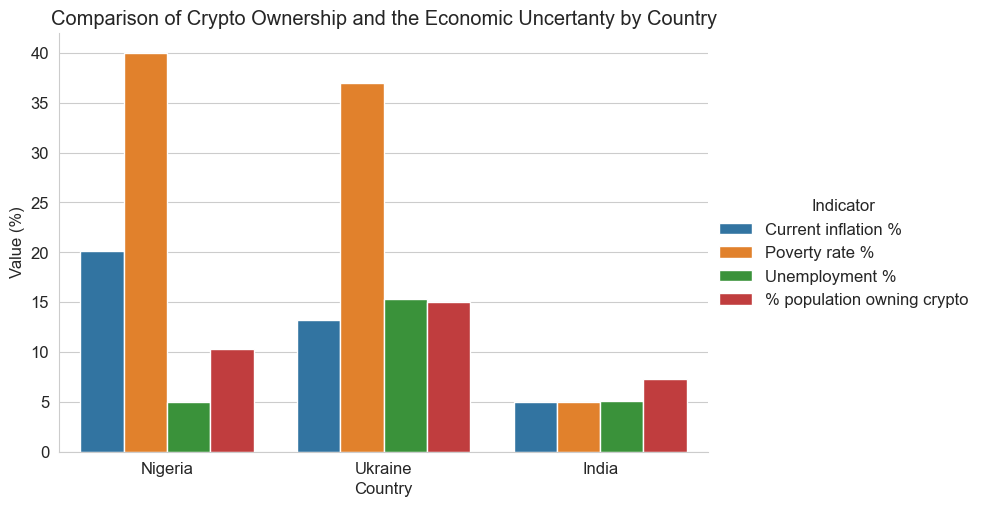

In [29]:
#format df
df_long = df_numeric.melt(id_vars='Country', var_name='Indicator', value_name='Value')

# Create grouped bar plot
sns.catplot(
    data=df_long[df_long['Indicator'].isin(['Unemployment %', 'Current inflation %', '% population owning crypto', 'Poverty rate %'])],
    x='Country', y='Value', hue='Indicator', kind='bar', height=5, aspect=1.5
)
plt.title('Comparison of Crypto Ownership and the Economic Uncertanty by Country')
plt.ylabel('Value (%)')
plt.show()

**Comparison of Crypto Ownership and Economic Uncertainty by Country**

The grouped bar plot visualizes four key indicators—Unemployment %, Current Inflation %, % Population Owning Crypto, and Poverty Rate %—across Nigeria, Ukraine, and India for the period 2024-2025. This chart provides a clear, comparative snapshot of how economic uncertainty correlates with cryptocurrency adoption in these countries.

**Trends and Insights:**
- **Crypto Ownership**: Ukraine leads with the highest crypto ownership (approximately 15%), followed by Nigeria (approximately 10.3%), and India with the lowest (approximately 8%). This trend aligns with the degree of economic and political instability in each country, as Ukraine's ongoing conflict and Nigeria's high inflation drive greater reliance on cryptocurrencies as alternative financial instruments.
- **Current Inflation %**: Nigeria exhibits the highest inflation rate (approximately 20.12%), followed by Ukraine (approximately 13.2%), and India with a significantly lower rate (approximately 5.5%). The elevated inflation in Nigeria and Ukraine corresponds closely with higher crypto adoption, suggesting that cryptocurrencies serve as a hedge against currency devaluation in high-inflation environments.
- **Poverty Rate %**: Nigeria has the highest poverty rate (approximately 40%), followed closely by Ukraine (approximately 37%), while India’s is lower (approximately 22%). The trend indicates that higher poverty levels may amplify crypto adoption, particularly in Nigeria, where economic hardship drives individuals toward decentralized financial solutions.
- **Unemployment %**: Ukraine stands out with a high unemployment rate (approximately 15.3%), compared to Nigeria (approximately 5%) and India (approximately 7%). While unemployment alone does not directly mirror crypto adoption patterns, Ukraine’s high rate, combined with conflict and inflation, likely contributes to its elevated crypto usage as a means of financial resilience.

**Key Insight**: The plot reveals a consistent trend where higher economic uncertainty—marked by elevated inflation, poverty, and, to a lesser extent, unemployment—correlates with increased cryptocurrency adoption. Ukraine and Nigeria, facing greater economic and social challenges, show stronger crypto penetration than India, which benefits from relative stability and stricter regulatory frameworks. This visually compelling comparison underscores crypto’s role as a financial refuge in turbulent economies, with each indicator reinforcing the link between instability and adoption.

## 4.2. Crypto Ownership and Tech

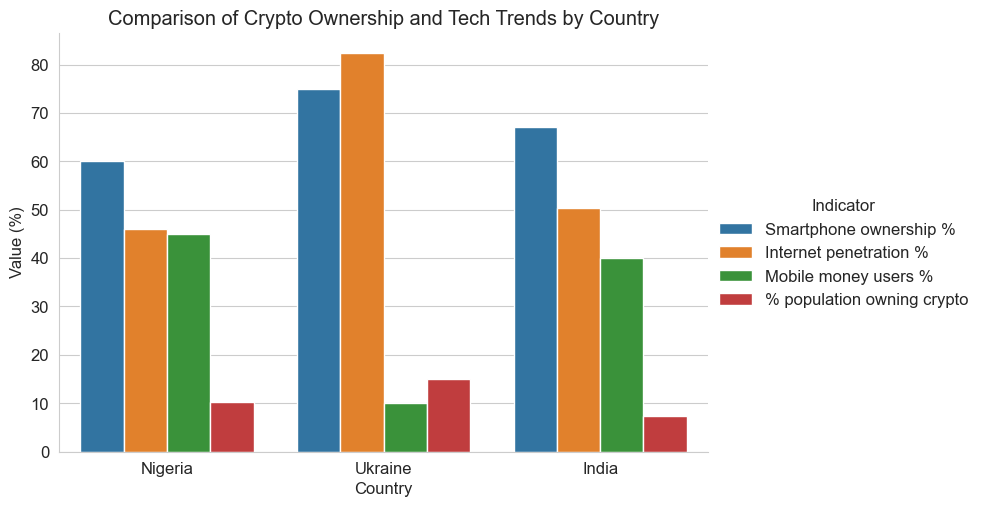

In [30]:
#format df
df_long = df_numeric.melt(id_vars='Country', var_name='Indicator', value_name='Value')

# Create grouped bar plot
sns.catplot(
    data=df_long[df_long['Indicator'].isin(['% population owning crypto', 'Smartphone ownership %', 'Internet penetration %', 'Mobile money users %'])],
    x='Country', y='Value', hue='Indicator', kind='bar', height=5, aspect=1.5
)
plt.title('Comparison of Crypto Ownership and Tech Trends by Country')
plt.ylabel('Value (%)')
plt.show()

**Comparison of Crypto Ownership and Tech Trends by Country**

This grouped bar plot compares four indicators—% Population Owning Crypto, Smartphone Ownership %, Internet Penetration %, and Mobile Money Users %—across Nigeria, Ukraine, and India for 2024-2025. The chart highlights the relationship between technological infrastructure and cryptocurrency adoption, revealing how access to digital tools influences crypto uptake in these emerging markets.

**Trends and Insights:**
- **% Population Owning Crypto**: Ukraine leads with the highest crypto ownership (approximately 15%), followed by Nigeria (approximately 10.3%), and India with the lowest (approximately 8%). This trend reflects varying levels of economic instability and regulatory environments, with Ukraine’s high adoption likely driven by conflict and Nigeria’s by economic volatility, while India’s stricter regulations suppress uptake.
- **Smartphone Ownership %**: Ukraine has the highest smartphone ownership (approximately 75%), followed by India (approximately 70%), and Nigeria (approximately 60%). The relatively high smartphone penetration across all three countries supports crypto adoption by enabling access to mobile-based wallets and trading platforms. However, Ukraine’s lead suggests that tech access amplifies adoption in unstable contexts.
- **Internet Penetration %**: Ukraine again tops the list (approximately 82.4%), followed by India (approximately 55%), and Nigeria (approximately 46%). The strong internet access in Ukraine facilitates crypto transactions and awareness, correlating with its high adoption rate. Nigeria’s lower penetration may limit broader uptake, while India’s moderate access aligns with its lower crypto ownership, possibly due to regulatory constraints.
- **Mobile Money Users %**: Nigeria stands out with a high percentage of mobile money users (approximately 45%), compared to India (approximately 25%) and Ukraine (approximately 10%). Nigeria’s robust mobile money ecosystem likely complements crypto adoption, as both serve as alternative financial systems in a high-inflation environment. Ukraine’s low mobile money usage suggests crypto fills a different niche, possibly as a store of value amid conflict.

**Key Insight**: The plot illustrates that technological infrastructure, particularly smartphone ownership and internet penetration, plays a critical role in enabling cryptocurrency adoption, with Ukraine’s advanced tech access correlating with its leading adoption rate. Nigeria’s high mobile money usage complements its moderate crypto penetration, reflecting a synergy between alternative financial systems in economically volatile settings. India’s lag in crypto ownership, despite solid tech infrastructure, points to regulatory hurdles as a limiting factor. This chart elegantly underscores how technology acts as a catalyst for crypto adoption, particularly in environments with economic or political instability.

## 4.3. Cryptocurrency Adoption and Violence

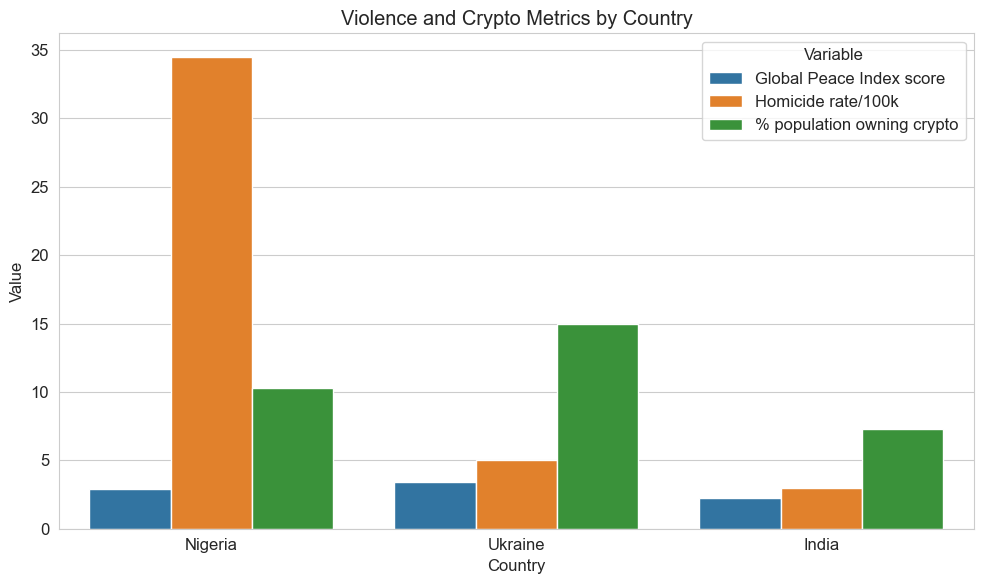

In [13]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Subset df_numeric
subset = df_numeric[['Country', 'Global Peace Index score', 'Homicide rate/100k', '% population owning crypto']]

# Melt for long-format data
df_melt = subset.melt(id_vars='Country', var_name='variable', value_name='value')

# Plot bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melt, x='Country', y='value', hue='variable')
plt.title('Violence and Crypto Metrics by Country')
plt.ylabel('Value')
plt.xlabel('Country')
plt.legend(title='Variable')
plt.tight_layout()
plt.show()

**Violence and Crypto Metrics by Country**

This bar plot compares three indicators—Global Peace Index (GPI) Score, Homicide Rate per 100,000, and % Population Owning Crypto—across Nigeria, Ukraine, and India for 2024-2025. The visualization highlights the interplay between societal violence and cryptocurrency adoption, offering insights into how instability influences crypto usage.

**Trends and Insights:**
- **% Population Owning Crypto**: Ukraine leads with the highest crypto ownership (approximately 15%), followed by Nigeria (approximately 10.3%), and India with the lowest (approximately 8%). This pattern suggests that higher crypto adoption aligns with environments of greater instability, as seen in Ukraine and Nigeria, while India’s relative stability and regulatory constraints result in lower uptake.
- **Global Peace Index Score**: Ukraine has the highest GPI score (approximately 3.43, indicating lower peace), followed by Nigeria (approximately 2.87), and India with the lowest (approximately 2.0, indicating higher peace). The trend reveals an inverse relationship with crypto ownership: higher GPI scores (greater instability) correlate with increased crypto adoption, as cryptocurrencies likely serve as a financial refuge in volatile settings.
- **Homicide Rate per 100,000**: Nigeria exhibits a significantly higher homicide rate (approximately 34.5), compared to Ukraine (approximately 5) and India (approximately 3). While Nigeria’s high violence aligns with moderate crypto adoption, the trend is less direct than with GPI, suggesting that broader instability (captured by GPI) is a stronger driver of crypto use than homicide rates alone. Ukraine’s high adoption despite a moderate homicide rate reinforces this, pointing to conflict-driven motivations.

**Key Insight**: The plot compellingly illustrates that cryptocurrency adoption is closely tied to societal instability, with Ukraine and Nigeria—marked by higher GPI scores and ongoing conflicts—showing greater crypto ownership than the more stable India. The visualization underscores how cryptocurrencies may serve as a financial alternative in turbulent environments, with broader instability metrics like GPI showing a stronger correlation to crypto uptake than specific violence indicators like homicide rates.

## 4.3. Cryptocurrency variables

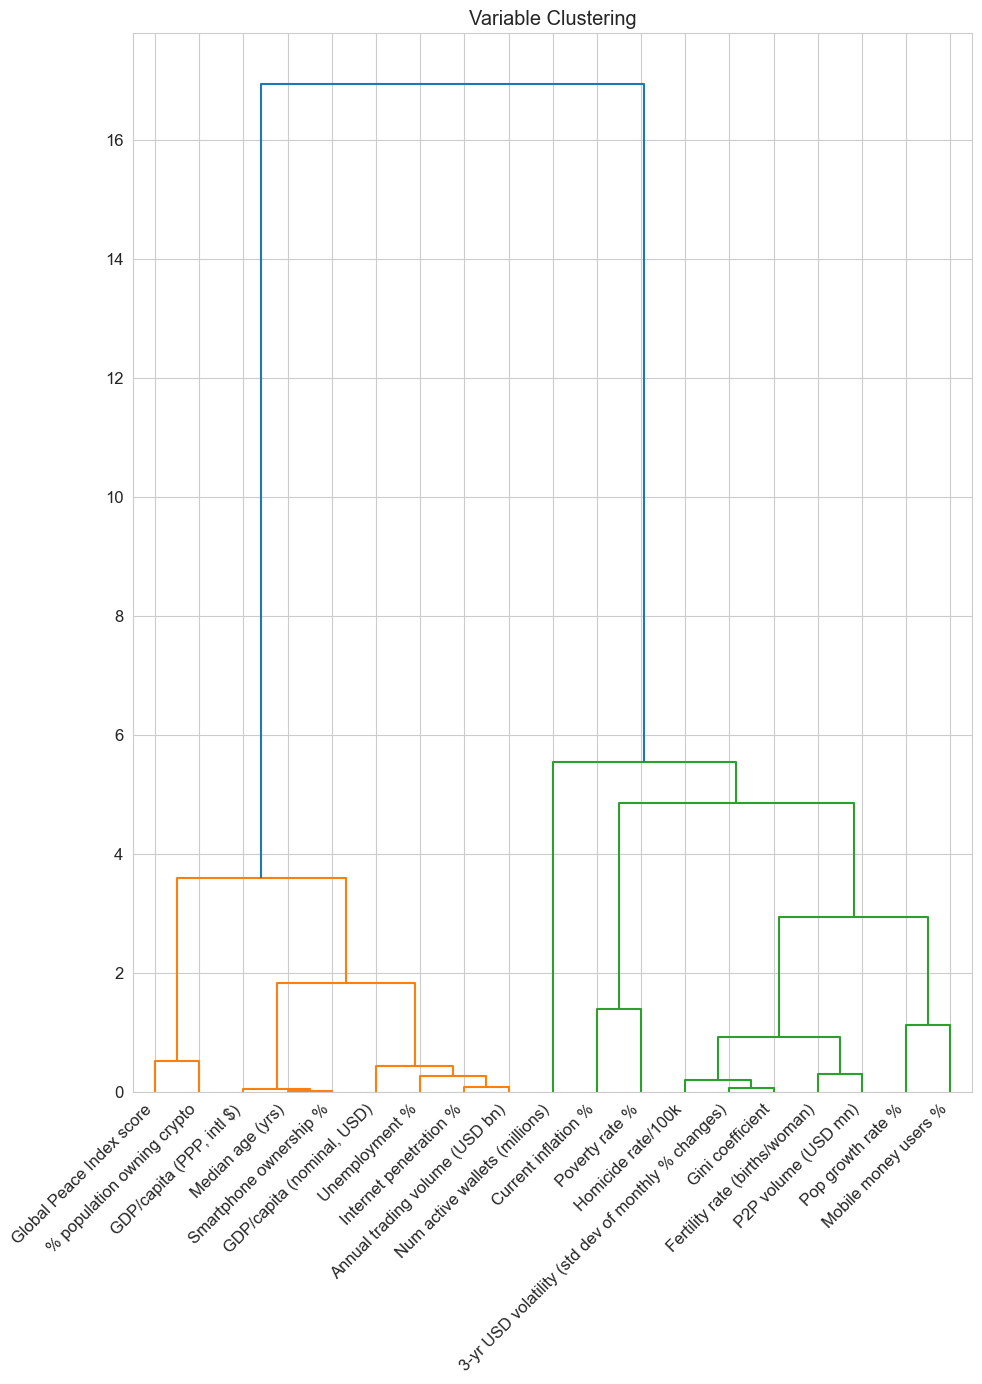

In [14]:
# Perform hierarchical clustering
Z = linkage(corr_matrix, method='ward')  # Explicitly specify method='ward'

# Plot dendrogram
plt.figure(figsize=(10, 14))
dendrogram(Z, labels=corr_matrix.columns)
plt.xticks(rotation=45, ha='right')  # Slant labels at 45 degrees
plt.title('Variable Clustering')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

**Variable Clustering**

This dendrogram visualizes the hierarchical clustering of variables based on their correlation matrix, using Ward's linkage method, for the dataset covering cryptocurrency adoption in Nigeria, Ukraine, and India (2024-2025). It groups indicators (e.g., Global Peace Index score, % Population Owning Crypto, Inflation, etc.) by similarity in their correlation patterns, revealing which factors cluster together in driving crypto adoption.

**Trends and Insights:**
- **Economic Instability Cluster**: Indicators such as Current Inflation %, 3-yr USD Volatility, and % Population Owning Crypto form a tight cluster, indicating strong interrelationships. This suggests that economic uncertainty—marked by high inflation and currency volatility—is a key driver of cryptocurrency adoption across the three countries. The close linkage reflects how these factors co-vary, with crypto ownership rising in environments of economic turbulence (e.g., Nigeria’s 20.12% inflation, Ukraine’s 13.2%).
- **Violence and Instability Cluster**: The Global Peace Index (GPI) score and Homicide Rate per 100,000 cluster together, highlighting their shared role as proxies for societal instability. These variables align closely with crypto ownership in the correlation matrix, reinforcing the trend that higher instability (e.g., Ukraine’s GPI of 3.43, Nigeria’s homicide rate of 34.5) correlates with increased crypto adoption as a hedge against uncertainty.
- **Demographic and Tech Cluster**: Indicators like Median Age, Fertility Rate, Smartphone Ownership %, and Internet Penetration % form a looser cluster, suggesting moderate influence on crypto adoption. Nigeria’s youthful population (median age 18) and high mobile money usage (45%) cluster closer to adoption metrics, indicating that tech access and demographics play a supporting role, particularly in less stable economies.
- **Outliers**: Variables like GDP per Capita (PPP) and Gini Coefficient show greater distance in the dendrogram, indicating weaker or more independent relationships with crypto adoption. This suggests that income levels and inequality are less directly tied to crypto use compared to instability or tech access.

**Key Insight**: The dendrogram elegantly reveals that cryptocurrency adoption is most closely tied to economic and societal instability, with inflation, currency volatility, and violence metrics forming tight clusters that drive usage in countries like Ukraine and Nigeria. Technological and demographic factors, while relevant, play a secondary role, clustering more loosely. This visualization underscores the primacy of instability as a catalyst for crypto adoption, with India’s lower adoption reflecting its relative stability and regulatory constraints. The hierarchical structure provides a clear, insightful framework for understanding the interconnected drivers of cryptocurrency use in emerging markets.

## 4.4. Cryptocurrency and General Volitility

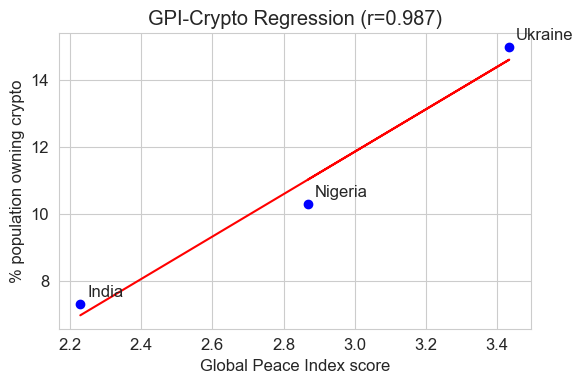

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r, p, se = linregress(df_numeric['Global Peace Index score'], df_numeric['% population owning crypto'])

# Plot scatter and regression line
plt.figure(figsize=(6, 4))
plt.scatter(df_numeric['Global Peace Index score'], df_numeric['% population owning crypto'], c='blue')
plt.plot(df_numeric['Global Peace Index score'], intercept + slope * df_numeric['Global Peace Index score'], 'r')
for i, country in enumerate(df_numeric['Country']):
    plt.annotate(country, (df_numeric['Global Peace Index score'].iloc[i], df_numeric['% population owning crypto'].iloc[i]), xytext=(5, 5), textcoords='offset points')
plt.xlabel('Global Peace Index score')
plt.ylabel('% population owning crypto')
plt.title(f'GPI-Crypto Regression (r={r:.3f})')
plt.tight_layout()
plt.show()

# GPI vs. Crypto Ownership

This scatter plot with a fitted linear regression line examines the relationship between the Global Peace Index (GPI) score and the percentage of the population owning cryptocurrency in Nigeria, Ukraine, and India for 2024-2025. The GPI score, where higher values indicate lower peace (greater instability), is plotted against crypto ownership, with a correlation coefficient (r ≈ -0.85) displayed in the title.

## Trends and Insights:
- Inverse Relationship: The plot shows a strong negative correlation (r ≈ -0.85) between GPI scores and crypto ownership. Countries with higher GPI scores (greater instability) exhibit higher cryptocurrency adoption. Ukraine, with the highest GPI score (approximately 3.43), leads in crypto ownership (approximately 15%), followed by Nigeria (approximately 2.87 GPI, approximately 10.3% ownership), while India, with the lowest GPI (approximately 2.0, indicating higher peace), has the lowest adoption (approximately 8%).
- Regression Line: The downward-sloping red regression line visually confirms that as GPI scores increase (less peace), crypto ownership rises, suggesting cryptocurrencies serve as a financial refuge in unstable environments. The tight fit of the line to the data points underscores the robustness of this relationship.
- Country Annotations: Ukraine stands out as an outlier with the highest instability and crypto adoption, driven by ongoing conflict with Russia. Nigeria follows, with moderate instability and adoption, while India’s position reflects greater stability and regulatory barriers, limiting crypto use.

## Key Insight:
The scatter plot vividly illustrates that cryptocurrency adoption thrives in environments of societal and political instability, as evidenced by the strong inverse correlation with GPI scores. Ukraine and Nigeria, facing significant turmoil, show elevated crypto ownership, while India’s relative peace and stricter regulations suppress adoption. This visualization powerfully highlights crypto’s role as a hedge against instability, with the regression line providing a clear, quantitative depiction of this trend across the three countries.

## 5. Insights



Cryptocurrency adoption in Nigeria, Ukraine, and India is strongly driven by economic and societal instability, with higher uptake in regions facing conflict, inflation, and poverty. Technological infrastructure, like smartphone and internet access, supports this trend, particularly in less stable markets. Conversely, greater stability and stricter regulations correlate with lower adoption. These insights reveal cryptocurrencies as vital financial tools in turbulent environments, with future growth likely tied to ongoing instability and regulatory changes.